Exercise 1. Create a Numpy array that contains a periodic signal, which is generated from the sum of two sine and two cosine functions. The frequency and amplitude of the sine and cosine components are arbitrary.<hr>


In [39]:
import numpy as np

import matplotlib.pyplot as plt

time        = np.arange(0, 32)
amplitude   = np.sin(time)+np.cos(time)+np.sin(time*2)+np.cos(time*2)

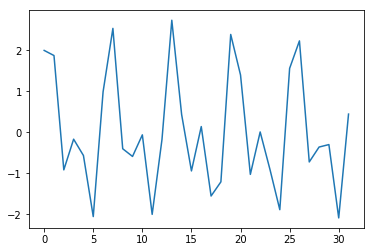

In [40]:
plt.plot(time, amplitude)

Exercise 2. Plot the resulting signal with Matplotlib. Calculate the FFT components of the signal and plot them.<hr>

In [41]:
def fft_v(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    if np.log2(N) % 1 > 0:
        raise ValueError("must be a power of 2")
        
    N_min = min(N, 2)
    
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))
    while X.shape[0] < N:
        X_even = X[:, :int(X.shape[1] / 2)]
        X_odd = X[:, int(X.shape[1] / 2):]
        terms = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + terms * X_odd,
                       X_even - terms * X_odd])
    return X.ravel()

True


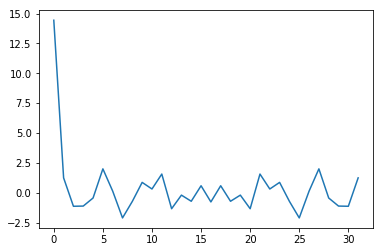

In [42]:
xfd = np.random.random(32)
agfsf = fft_v(xfd)
print(np.allclose(agfsf, np.fft.fft(xfd)))
plt.plot(agfsf)

Exercise 3. Add random noise to the original signal and redo the tasks of exercise 2.<hr>

In [ ]:
yy = fft_v(amplitude)
plt.plot(time,yy)



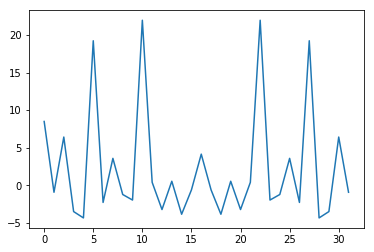

In [44]:
noise = np.random.normal(0,1,32)
y_noise = amplitude + noise
yy_noise = fft_v(y_noise)
plt.plot(time,yy_noise)


Exercise 4. Standardize the original and the noisy signal to have zero mean and unit variance. Plot the resulting signals.<hr>

In [48]:
normed_orig = (amplitude - amplitude.mean(axis=0)) / amplitude.std(axis=0)
np.sum(normed_orig, axis = 0)

9.992007221626409e-16

In [47]:
normed_orig.std(axis=0)

0.9999999999999999

In [50]:
normed_noise = (y_noise - y_noise.mean(axis=0)) / y_noise.std(axis=0)
np.sum(normed_noise, axis = 0)

0.0

In [51]:
normed_noise.std(axis=0)

1.0

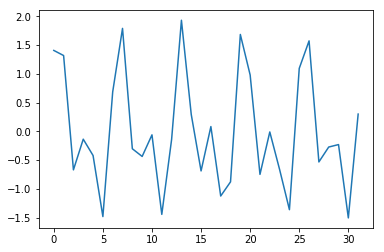

In [53]:
plt.plot(time,normed_orig)

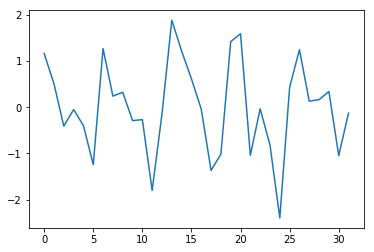

In [52]:
plt.plot(time,normed_noise)


Exercise 5. Create two arbitrary signals as sum of sines and cosines and use a clustering algorithm to automatically classify them.

In [54]:
amplitude_clust1   = np.sin(time)+np.cos(time)
amplitude_clust2  = np.sin(time*2)+np.cos(time*2)

[[ 1.10396734  0.71274258]
 [-1.11148037  0.67520098]
 [ 0.04489343 -1.12873035]]


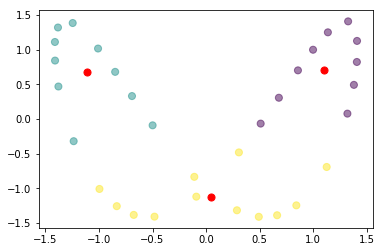

In [62]:
import pandas as pd
from sklearn.cluster import KMeans
df =pd.DataFrame({'x': amplitude_clust1, 'y': amplitude_clust2}) 

kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()